In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 图表显示中文
plt.rcParams['font.sans-serif'] =['SimHei']

In [56]:
f = open('Medical Cost Personal Datasets.csv')# 打开csv文件
f_pd = pd.read_csv('Medical Cost Personal Datasets.csv') # 读取csv文件
f_np = np.array(f_pd) # 转为数组，去除首行（表头）
print(f_np)

[[19 'female' 27.9 ..., 'yes' 'southwest' 16884.924]
 [18 'male' 33.77 ..., 'no' 'southeast' 1725.5523]
 [28 'male' 33.0 ..., 'no' 'southeast' 4449.462]
 ..., 
 [18 'female' 36.85 ..., 'no' 'southeast' 1629.8335]
 [21 'female' 25.8 ..., 'no' 'southwest' 2007.945]
 [61 'female' 29.07 ..., 'yes' 'northwest' 29141.3603]]


  年龄区间(岁)  人数(人)
0    0-20    137
1   20-40    537
2   40-60    550
3   60-80    114
4   80及以上      0


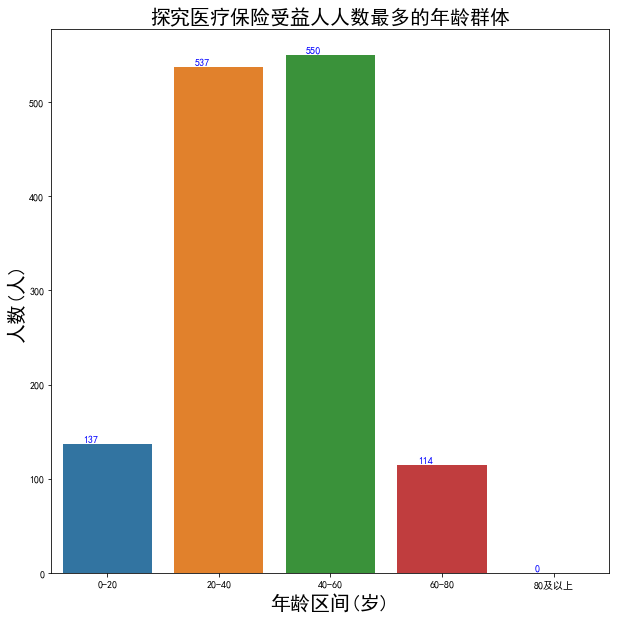

In [57]:
'''
对年龄这一列的数据处理
处理成新的数组进行可视化
'''

def A_picture_age():
    # 图表显示中文
    plt.rcParams['font.sans-serif'] =['SimHei']

    # 取出年龄一列的数据
    f_np_age = f_np[:,0]

    # 定义统计年龄的函数
    def count_age(a,b):
        count = 0
        for i in range(len(f_np_age)):
            if int(f_np_age[i])<b and int(f_np_age[i])>=a:
                count +=1
        return count
    
    # 计算年龄0-20的人数
    count_0_20 = count_age(0,20)

    # 计算年龄20-40的人数
    count_20_40 = count_age(20,40)

    # 计算年龄40-60的人数
    count_40_60 = count_age(40,60)

    # 计算年龄60-80的人数
    count_60_80 = count_age(60,80)

    # 计算年龄80以上的人数(单独处理)
    count_80_100 = 0
    for i in range(len(f_np_age)):
        if int(f_np_age[i])>=80:
            count_80_100 += 1

    #建立新的数组
    f_np_age_new = list([['0-20',count_0_20],['20-40',count_20_40],['40-60',count_40_60],['60-80',count_60_80],['80及以上',count_80_100]])
    header = ['年龄区间(岁)','人数(人)']

    age_picture = pd.DataFrame(f_np_age_new,columns=header)
    print(age_picture)

    # 将新的age数组可视化(条形图)
    plt.figure(figsize = (10,10))
    plt.title('探究医疗保险受益人人数最多的年龄群体',fontsize=20)
    ax = sns.barplot(data=age_picture,x='年龄区间(岁)',y='人数(人)')
    plt.xlabel('年龄区间(岁)',fontsize=20)
    plt.ylabel('人数(人)',fontsize=20)
    for p in ax.patches:
        ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center',va='bottom',color='blue')
    plt.show()

A_picture_age()

['男', '女']
[676, 662]


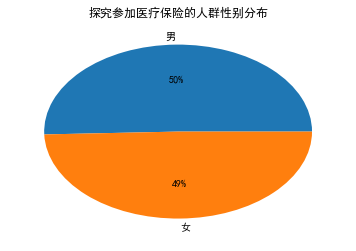

In [58]:
'''
对性别这一列的数据处理
处理成新的数组进行可视化
'''

def B_picture_sex():
    # 取出性别一列的数据
    f_np_sex = f_np[:,1]

    # 计算male(0)和female(1)的人数
    count_male = 0
    count_female = 0
    for i in range(len(f_np_sex)):
        if f_np_sex[i] in 'male':
            count_male += 1
        else:
            count_female +=1

    #建立新的数组
    labels = ['男','女']
    sizes = [count_male,count_female]
    print(labels)
    print(sizes)
    
    # 将新的sex数组可视化(饼图)
    plt.title('探究参加医疗保险的人群性别分布')
    plt.pie(x=sizes,labels=labels,autopct='%d%%')
    plt.show()

B_picture_sex()

             bmi  人数(人)
0      偏瘦(<18.5)     24
1  正常(18.5-23.9)    164
2  超重(23.9-27.8)    278
3     肥胖(>=27.8)    872


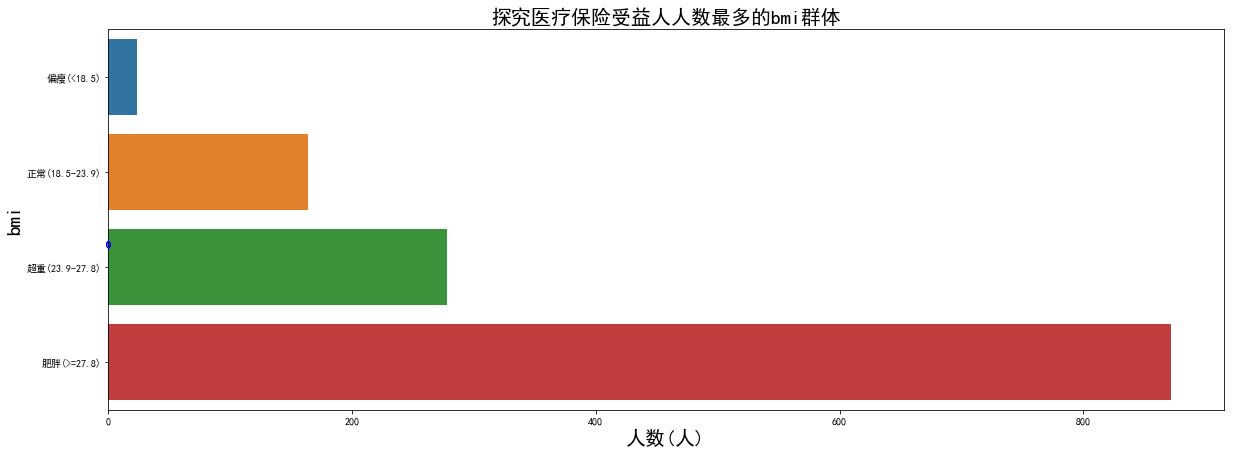

In [59]:
'''
对bmi这一列的数据处理
处理成新的数组进行可视化
'''

def C_picture_bmi():
    # 取出bmi一列的数据
    f_np_bmi = f_np[:,2]

    # 定义统计bmi的函数
    def count_bmi(a,b):
        count = 0
        for i in range(len(f_np_bmi)):
            if int(f_np_bmi[i])<b and int(f_np_bmi[i])>=a:
                count +=1
        return count

    # 计算bmi偏瘦(<18.5)的人数
    count_thin = count_bmi(0,18.5)

    # 计算bmi正常(18.5-23.9)的人数
    count_normal = count_bmi(18.5,23.9)

    # 计算bmi超重(23.9-27.8)的人数
    count_overweight = count_bmi(23.9,27.8)

    # 计算bmi肥胖(>=27.8)的人数(单独处理)
    count_fat = 0
    for i in range(len(f_np_bmi)):
        if int(f_np_bmi[i])>=27.8:
            count_fat += 1

    #建立新的数组
    f_np_bmi_new = list([['偏瘦(<18.5)',count_thin],['正常(18.5-23.9)',count_normal],['超重(23.9-27.8)',count_overweight],['肥胖(>=27.8)',count_fat]])
    header = ['bmi','人数(人)']

    bmi_picture = pd.DataFrame(f_np_bmi_new,columns=header)
    print(bmi_picture)

    # 将新的bmi数组可视化(条形图)
    plt.figure(figsize = (20,7))
    plt.title('探究医疗保险受益人人数最多的bmi群体',fontsize=20)
    ax = sns.barplot(data=bmi_picture,y='bmi',x='人数(人)')
    plt.xlabel('人数(人)',fontsize=20)
    plt.ylabel('bmi',fontsize=20)
    for p in ax.patches:
        ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center',va='bottom',color='blue')
    plt.show()
    
C_picture_bmi()

['没有孩子', '有一个孩子', '有二个孩子', '有三个孩子', '有四个孩子', '有五个孩子']
[574, 324, 240, 157, 25, 18]


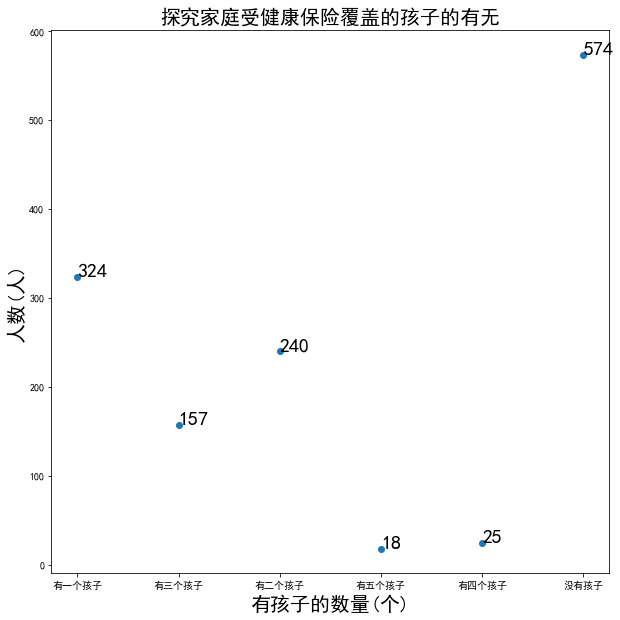

In [60]:
'''
对是孩子这一列的数据处理
处理成新的数组进行可视化
'''

def D_picture_children():
    # 取出孩子一列的数据
    f_np_kid = f_np[:,3]

    # 计算无孩子的人数
    count_0 = 0
    for i in range(len(f_np_kid)):
        if int(f_np_kid[i]) == 0:
            count_0 += 1

    # 计算有1孩子的人数
    count_1 = 0
    for i in range(len(f_np_kid)):
        if int(f_np_kid[i]) == 1:
            count_1 += 1

    # 计算有2孩子的人数
    count_2 = 0
    for i in range(len(f_np_kid)):
        if int(f_np_kid[i]) == 2:
            count_2 += 1

    # 计算有3孩子的人数
    count_3 = 0
    for i in range(len(f_np_kid)):
        if int(f_np_kid[i]) == 3:
            count_3 += 1

    # 计算有4孩子的人数
    count_4 = 0
    for i in range(len(f_np_kid)):
        if int(f_np_kid[i]) == 4:
            count_4 += 1

    # 计算有5孩子的人数
    count_5 = 0
    for i in range(len(f_np_kid)):
        if int(f_np_kid[i]) == 5:
            count_5 += 1

    #建立新的数组
    x = ['没有孩子','有一个孩子','有二个孩子','有三个孩子','有四个孩子','有五个孩子']
    y = [count_0,count_1,count_2,count_3,count_4,count_5]
    print(x)
    print(y)

    # 将新的children数组可视化(散点图)
    plt.figure(figsize = (10,10))
    plt.title('探究家庭受健康保险覆盖的孩子的有无',fontsize=20)
    plt.scatter(x,y)
    plt.xlabel('有孩子的数量(个)',fontsize=20)
    plt.ylabel('人数(人)',fontsize=20)
    for i in range(len(y)):
        plt.annotate(y[i], (x[i], y[i]),fontsize=20)
    plt.show()

D_picture_children()

['不吸烟', '吸烟']
[1064, 274]


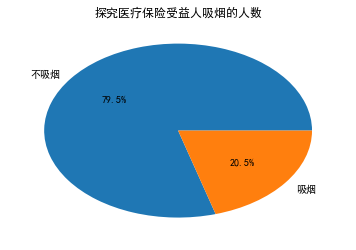

In [61]:
'''
对是否吸烟这一列的数据处理
处理成新的数组进行可视化
'''

def E_picture_smoke():
    # 取出吸烟一列的数据
    f_np_smoke = f_np[:,4]

    # 计算吸烟(1)和不吸烟(0)的人数
    count_no = 0
    count_yes = 0
    for i in range(len(f_np_smoke)):
        if f_np_smoke[i] in 'no':
            count_no+= 1
        else:
            count_yes +=1
    
    #建立新的数组
    labels = ['不吸烟','吸烟']
    sizes = [count_no,count_yes]
    print(labels)
    print(sizes)

    # 将新的smoke数组可视化(饼图)
    plt.title('探究医疗保险受益人吸烟的人数')
    plt.pie(x=sizes,labels=labels,autopct='%.1f%%')
    plt.figure(figsize = (20, 6))
    plt.show()

E_picture_smoke()

['0-1w', '1-2w', '2-3w', '3-4w', '4-5w', '5w及以上']
[712, 353, 111, 83, 72, 7]


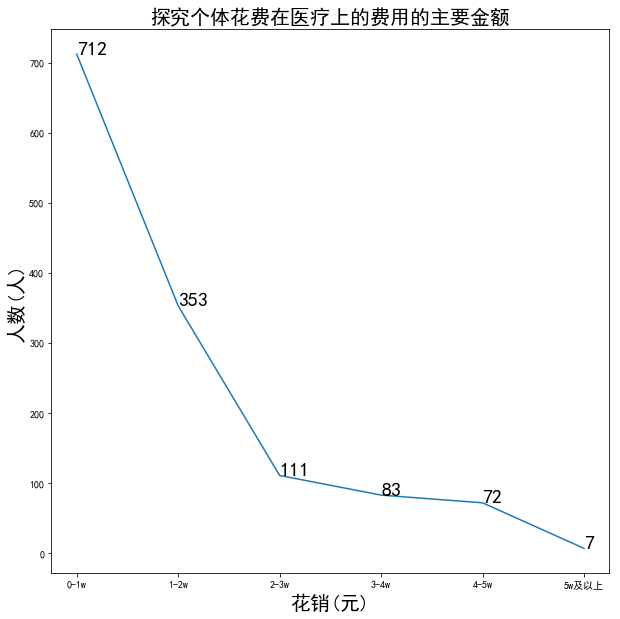

In [62]:
'''
对花销这一列的数据处理
处理成新的数组进行可视化
'''

def F_picture_charge():
    # 取出花销一列的数据
    f_np_charge = f_np[:,6]

    # 定义统计消费的函数
    def count_charge(a,b):
        count = 0
        for i in range(len(f_np_charge)):
            if int(f_np_charge[i])<b and int(f_np_charge[i])>=a:
                count +=1
        return count

    # 计算花销在0-1w的人数
    count_0_1 = count_charge(0,10000)

    # 计算花销在1-2w的人数
    count_1_2 = count_charge(10000,20000)

    # 计算花销在2-3w的人数
    count_2_3 = count_charge(20000,30000)

    # 计算花销在3-4w的人数
    count_3_4 = count_charge(30000,40000)

    # 计算花销在4-5w的人数
    count_4_5 = count_charge(40000,50000)

    # 计算花销在5w及以上的人数
    count_5_6 = 0
    for i in range(len(f_np_charge)):
        if int(f_np_charge[i])>=50000:
            count_5_6 += 1

    #建立新的数组
    x = ['0-1w','1-2w','2-3w','3-4w','4-5w','5w及以上']
    y = [count_0_1,count_1_2,count_2_3,count_3_4,count_4_5,count_5_6]
    print(x)
    print(y)

    # 将新的charge数组可视化(条形图)
    plt.figure(figsize = (10,10))
    plt.title('探究个体花费在医疗上的费用的主要金额',fontsize=20)
    plt.xlabel('花销(元)',fontsize=20)
    plt.ylabel('人数(人)',fontsize=20)
    plt.plot(x,y)
    for i in range(len(y)):
        plt.annotate(y[i], (x[i], y[i]),fontsize=20)
    plt.show()
    
F_picture_charge()

----------------------Python----------------------
现有以下6种图表可供选择
A.探究医疗保险受益人人数最多的年龄群体
B.探究参加医疗保险的人群性别分布
C.探究医疗保险受益人人数最多的bmi群体
D.探究家庭受健康保险覆盖的孩子的有无
E.探究医疗保险受益人吸烟的人数
F.探究个体花费在医疗上的费用的主要金额
请选择您所要查询的图表：
A
  年龄区间(岁)  人数(人)
0    0-20    137
1   20-40    537
2   40-60    550
3   60-80    114
4   80及以上      0


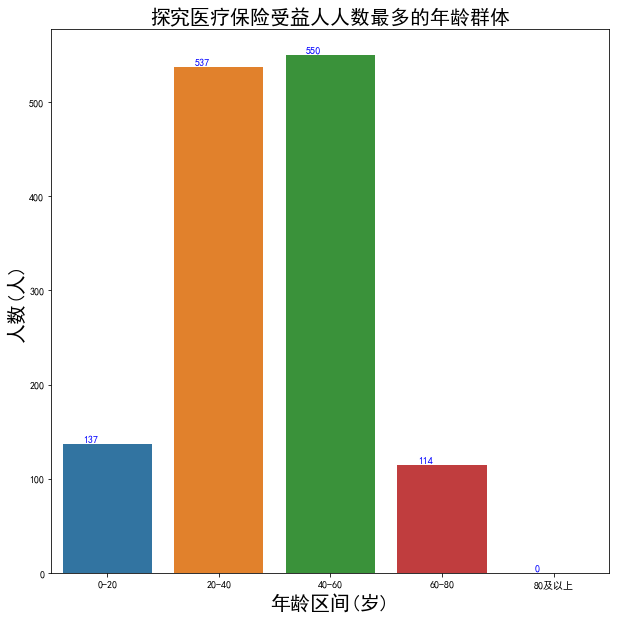

--------------------------------------------------
请选择继续查询还是结束：
查询/结束
查询
请选择您所要查询的图表：
B
['男', '女']
[676, 662]


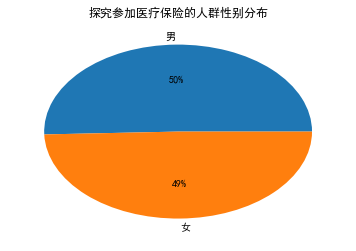

--------------------------------------------------
请选择继续查询还是结束：
查询/结束
查询
请选择您所要查询的图表：
C
             bmi  人数(人)
0      偏瘦(<18.5)     24
1  正常(18.5-23.9)    164
2  超重(23.9-27.8)    278
3     肥胖(>=27.8)    872


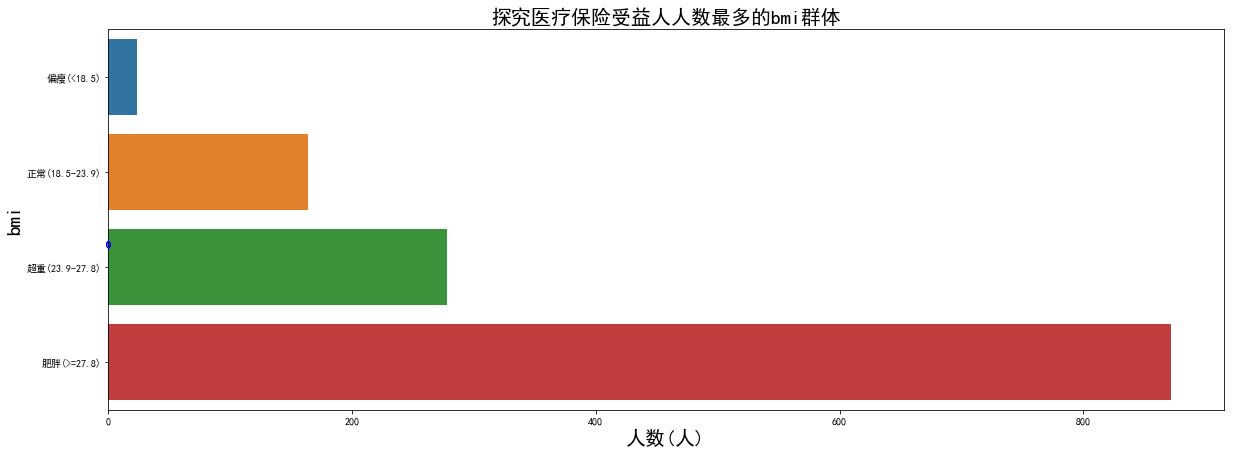

--------------------------------------------------
请选择继续查询还是结束：
查询/结束
查询
请选择您所要查询的图表：
F
['0-1w', '1-2w', '2-3w', '3-4w', '4-5w', '5w及以上']
[712, 353, 111, 83, 72, 7]


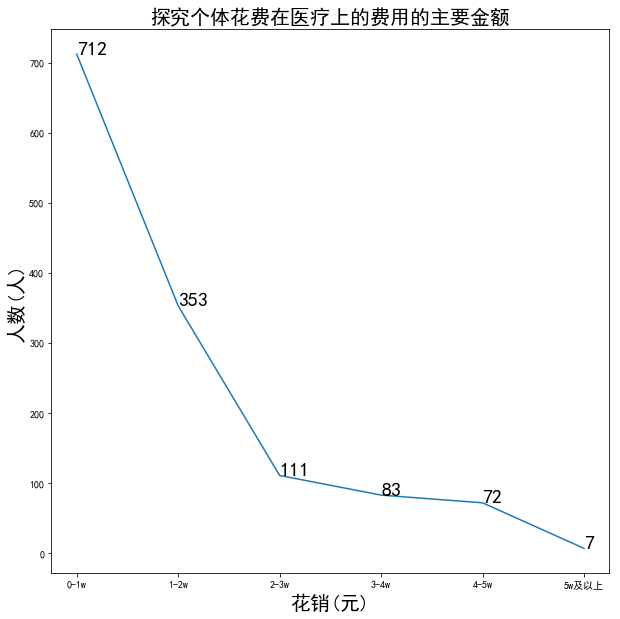

--------------------------------------------------
请选择继续查询还是结束：
查询/结束
结束
感谢查询


In [63]:
# 主体
print("{:-^50}".format("Python"))
print("现有以下6种图表可供选择")
print("A.探究医疗保险受益人人数最多的年龄群体")
print("B.探究参加医疗保险的人群性别分布")
print("C.探究医疗保险受益人人数最多的bmi群体")
print("D.探究家庭受健康保险覆盖的孩子的有无")
print("E.探究医疗保险受益人吸烟的人数")
print("F.探究个体花费在医疗上的费用的主要金额")
print("请选择您所要查询的图表：")

def jud_choice():

    if choice in 'A':
        A_picture_age()

    elif choice in 'B':
        B_picture_sex()

    elif choice in 'C':
        C_picture_bmi()

    elif choice in 'D':
        D_picture_children()

    elif choice in 'E':
        E_picture_smoke()

    else:
        F_picture_charge()

while True:
    choice = input()
    jud_choice()
    print("{:-^50}".format('------'))
    print("请选择继续查询还是结束：")
    print("查询/结束")
    end = input()
    if end in '结束':
        print("感谢查询")
        break
    else:
        print("请选择您所要查询的图表：")
        continue
